# Achievement 4, Task 10 (Part One)

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 

In [2]:
#path to Instacart Basket Analysis folder 
path = r'/Users/libertyonia/Documents/Instacart Basket Analysis'

In [3]:
#import ords_prods_cust_4-9.pkl
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_4-9.pkl'))

# Question 1
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [4]:
#peak into first few rows of ords_prods_cust dataframe 
ords_prods_cust.head(5)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,3367565,1,prior,6,2,7,19.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
#looks at the columns in the ords_prods_cust dataframe 
ords_prods_cust.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spending',
 'spending_flag',
 'median_dspo',
 'order_behavior',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 '_merge']

In [6]:
#count columns and rows in the ords_prods_cust table 
ords_prods_cust.shape

(30328763, 34)

# Question 2
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### Answer: 
The customers information that was merged into the ords_prods dataframe included personal identifiable information. The information includes the first name, last name, state, age, number of dependents, and income status of each customer. If a customer has a unique name, then they might be easily identifiable. 

# Question 3 
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
#Create a regional segmentation of the data 
result = [] 
northeast = ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa', 'Missouri']
south = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia','North Carolina','South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho', 'Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

for value in ords_prods_cust['STATE']:
    if value in northeast:
        result.append("Northeast")
    elif value in midwest:
        result.append("Midwest")
    elif value in south:
        result.append("South")
    else:
        result.append("West")

In [8]:
#Add Region column to the ords_prods_merge table
ords_prods_cust['Region'] = result

In [9]:
#count the frequency of the region column 
ords_prods_cust['Region'].value_counts(dropna = False)

South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: Region, dtype: int64

In [10]:
#count the frequency of spending flag column
ords_prods_cust['spending_flag'].value_counts(dropna = False)

Low spender     29730516
High spender      598247
Name: spending_flag, dtype: int64

In [11]:
#group by the spending flags and regions 
ords_prods_cust.groupby(['spending_flag','Region']).agg({'Region':'count'})

Region
spending_flag Region            
High spender  Midwest     148321
              Northeast   102905
              South       197099
              West        149922
Low spender   Midwest    6959265
              Northeast  5253367
              South      9902718
              West       7615166

# Answer 3
### Determine whether there’s a difference in spending habits between the different U.S. regions. 
The South has the most customers compared to all other regions. The West and Midwest have similar amount of customers. The Northeast has the least customers compared to all other regions. The South has the most high spenders. The West and Midwest have the similar amount of high spenders. The Norteast has the least high spender customers. 

Interestingly, the South has the most low spenders. The West has second highest amount of low spenders, followed by the Midwest, and the Northeast. 

# Question 4 
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
#Create a list of low-activity and high-activity customer
results_2 = []

for value in ords_prods_cust['max_order']:
    if value <= 5:
        results_2.append('Low-activity Customer')
    else: 
        results_2.append('High-activity Customer')

In [13]:
#add customer activity list to the ords_prods_cust dataframe 
ords_prods_cust['Customer Activity'] = results_2

In [14]:
#count the Customer Activity column
ords_prods_cust['Customer Activity'].value_counts(dropna = False)

High-activity Customer    28668554
Low-activity Customer      1660209
Name: Customer Activity, dtype: int64

In [15]:
#Create a new dataframe excluding the low-activity customers 
ords_prods_cust_v2 = ords_prods_cust.drop(ords_prods_cust[ords_prods_cust['Customer Activity'] == 'Low-activity Customer'].index)

In [16]:
#count the customer activity column in the ords_prods_cust_v2 dataframe 
ords_prods_cust_v2['Customer Activity'].value_counts(dropna = False)

High-activity Customer    28668554
Name: Customer Activity, dtype: int64

# Question 5 
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# Profiles 
- age_status column: adult, elderly 
- family status column: single, family 

Profiles were combined to create age_family profile containing the follow combinations: 
- adult w/o dependants
- elderly w/o dependants
- adult w/ dependants
- elderly w/ dependants

In [17]:
#Assign age groups to teen, adult, and elderly 

results_3 = []

for value in ords_prods_cust_v2['Age']:
    if value < 18:
        results_3.append('teen')
    elif 18 < value <= 65:
        results_3.append('adult')
    else: 
        results_3.append('elderly')

In [18]:
#assign results_3 list to new column called 'age_status'
ords_prods_cust_v2['age_status'] = results_3

In [19]:
#count values in 'age_status' column 
ords_prods_cust_v2['age_status'].value_counts(dropna = False)

adult      21065589
elderly     7602965
Name: age_status, dtype: int64

In [20]:
#Assign family status to ords_prods_cust_v2 data frame 
#first create a list results_4 

results_4 = []

for value in ords_prods_cust_v2['n_dependants']:
    if value <= 1: 
        results_4.append('w/o dependants')
    else: 
        results_4.append('w/ dependants')
        
#second assign to new column called family_status 
ords_prods_cust_v2['family_status'] = results_4

In [21]:
#counts the family_status values 
ords_prods_cust_v2['family_status'].value_counts(dropna= False)

w/ dependants     14357253
w/o dependants    14311301
Name: family_status, dtype: int64

In [22]:
#import departments.csv 
departments = pd.read_csv(os.path.join(path,'02 Data','Original Data','departments.csv'))

In [23]:
#create a new column to concatenating the age status and family status 
ords_prods_cust_v2['age_family'] = ords_prods_cust_v2['age_status'] + " " + ords_prods_cust_v2['family_status'] 


In [24]:
#counts values of the ords_prods_cust_v2['age_family'] column 
ords_prods_cust_v2['age_family'].value_counts(dropna = False)

adult w/o dependants      10546378
adult w/ dependants       10519211
elderly w/ dependants      3838042
elderly w/o dependants     3764923
Name: age_family, dtype: int64

# Import and assign department names to ords_prods_cust_v2 dataframe 
Previously I wasn't able to include the department names into the ords_prods_cust dataframe. I tried merging the departments dataframe with the ords_prods_cust dataframe, but it would cause the kernel to go dead. To fix this issue, I decided to make a for loop and assign the department names individually. 

In [25]:
#import departments csv 
departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'))

#rename column 'Unnamed: 0' to department id 
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [26]:
#create a departments columns 

d = []

for x in ords_prods_cust_v2['department_id']:
    if x == 1: 
        d.append('frozen')
    if x == 2:
        d.append('other')
    if x == 3:
        d.append('bakery')
    if x == 4:
        d.append('produce')
    if x == 5:
        d.append('alcohol')
    if x == 6:
        d.append('international')
    if x == 7: 
        d.append('beverages')
    if x == 8:
        d.append('pets')
    if x == 9: 
        d.append('dry goods pasta')
    if x == 10: 
        d.append('bulk')
    if x == 11:
        d.append('personal care')
    if x == 12:
        d.append('meat seafood')
    if x == 13:
        d.append('pantry')
    if x == 14:
        d.append('breakfast')
    if x == 15: 
        d.append('canned goods')
    if x == 16: 
        d.append('dairy eggs')
    if x == 17:
        d.append('household')
    if x == 18: 
        d.append('babies')
    if x == 19: 
        d.append('snacks')
    if x == 20:
        d.append('deli')
    elif x == 21:
        d.append('missing')

In [27]:
#assign department names to the department_name columns 
ords_prods_cust_v2['department_name'] = d

In [28]:
#Check if the for loop worked 
ords_prods_cust_v2['department_name'].value_counts(dropna = False)

produce            8432758
dairy eggs         4810325
snacks             2566692
beverages          2385689
frozen             1946621
pantry             1641229
bakery             1037893
canned goods        930532
deli                927001
dry goods pasta     754545
household           641745
meat seafood        622005
breakfast           619538
personal care       389793
babies              385780
international       235050
alcohol             130980
pets                 85684
missing              61434
other                31758
bulk                 31502
Name: department_name, dtype: int64

# Question 6 
Create an appropriate visualization to show the distribution of profiles.

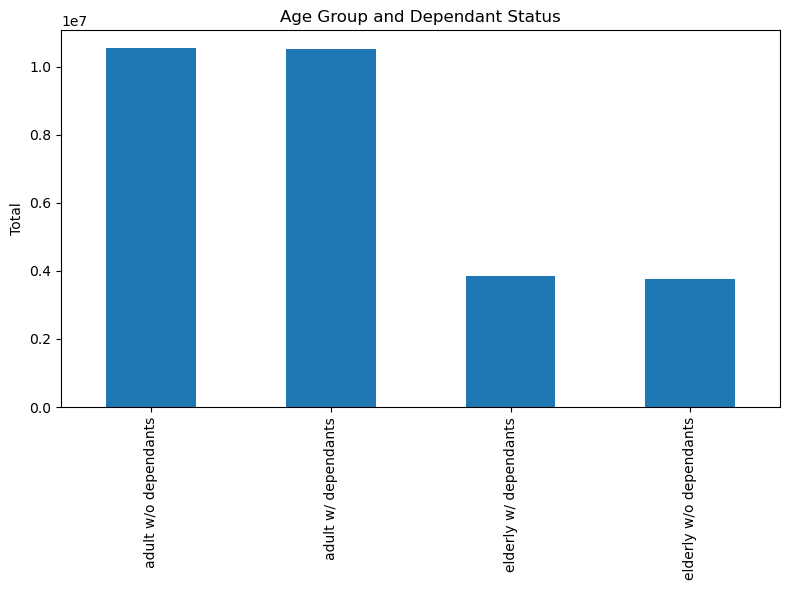

In [29]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

#Total frequency of age_family column 
age_family_bar = ords_prods_cust_v2['age_family'].value_counts().plot.bar(ax=ax)
age_family_bar.set_title('Age Group and Dependant Status')
age_family_bar.set_ylabel('Total')

# Adjust the layout to fit the entire chart
plt.tight_layout()

In [30]:
#Export age_family_bar
age_family_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','total_profile.png'))

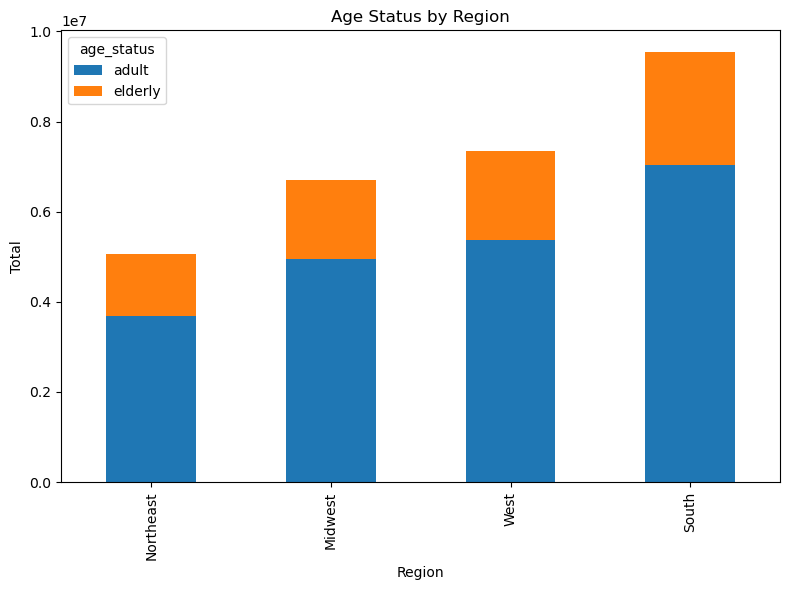

In [31]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

#bar column of the region and age status 
age_status_region = pd.crosstab(ords_prods_cust_v2['Region'],ords_prods_cust_v2['age_status'],dropna = False)
age_status_region = age_status_region.sort_values(by=['adult'], ascending = True)
age_status_region = age_status_region.plot.bar(ax=ax, stacked= True)
age_status_region.set_ylabel('Total')
age_status_region.set_title('Age Status by Region')

# Adjust the layout to fit the entire chart
plt.tight_layout()

In [32]:
#Export age_status_region
age_status_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','total_profile_by_region.png'))

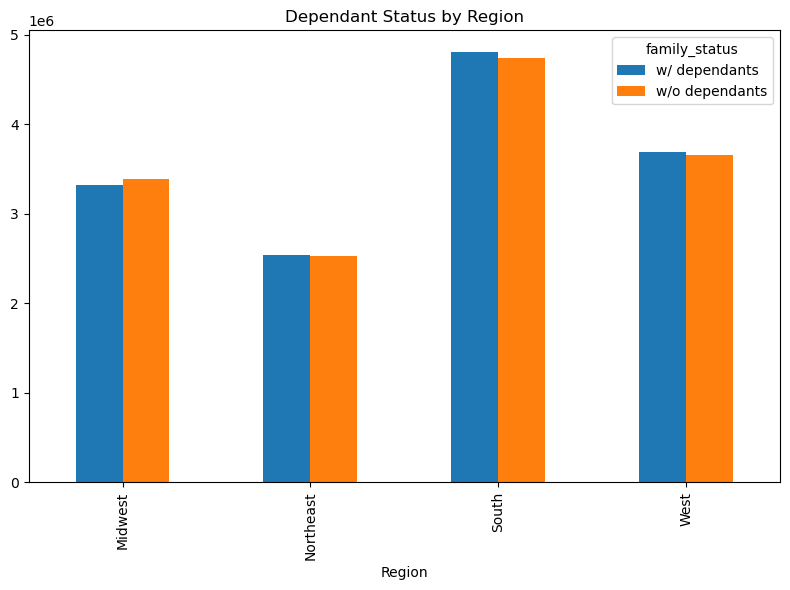

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

#bar column of the region and family status 
family_status_region = pd.crosstab(ords_prods_cust_v2['Region'],ords_prods_cust_v2['family_status'],dropna = False)
family_status_region = family_status_region.plot.bar(ax = ax)
family_status_region.set_title('Dependant Status by Region')

plt.tight_layout()

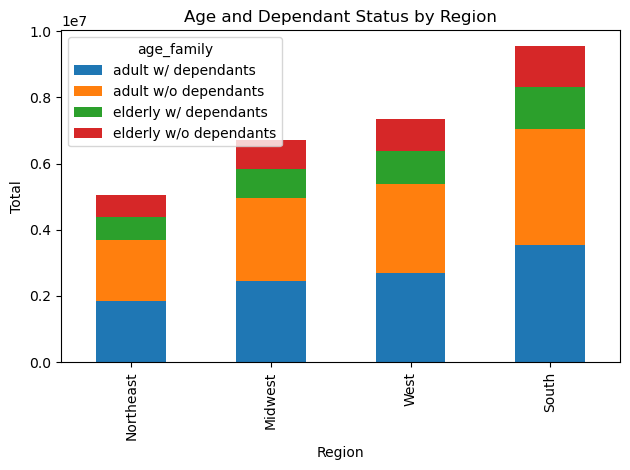

In [34]:
#bar column of the region and family status 
age_family_status_region = pd.crosstab(ords_prods_cust_v2['Region'],ords_prods_cust_v2['age_family'],dropna = False)
age_family_status_region = age_family_status_region.sort_values(by=['adult w/o dependants'], ascending = True)
age_family_status_region = age_family_status_region.plot.bar(stacked = True)
age_family_status_region.set_title('Age and Dependant Status by Region')
age_family_status_region.set_ylabel('Total')

plt.tight_layout()

In [35]:
#export age_family_status_region
age_family_status_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependant_region.png'))

# Question 7 
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [36]:
#maximum, minimum, and average income by age_family status 
income_stats = ords_prods_cust_v2.groupby('age_family').agg({'income':['max','min','mean']})
income_stats

income                      
                           max    min           mean
age_family                                          
adult w/ dependants     592409  25911   94738.081966
adult w/o dependants    584097  25903   95137.303990
elderly w/ dependants   593901  26671  113616.051564
elderly w/o dependants  576876  26067  112935.719711

In [37]:
#maximum, minimum, and average max_order spent by age_family status 
price_stats = ords_prods_cust_v2.groupby('age_family').agg({'prices':['max','min','mean']})
price_stats

prices               
                          max  min      mean
age_family                                  
adult w/ dependants      25.0  1.0  7.787675
adult w/o dependants     25.0  1.0  7.790388
elderly w/ dependants    25.0  1.0  7.790542
elderly w/o dependants   25.0  1.0  7.799847

In [38]:
#maximum, minimum, and average median_dspo by age_family status 
dspo_stats = ords_prods_cust_v2.groupby('age_family').agg({'median_dspo' : ['max','min','mean']})
dspo_stats

median_dspo               
                               max  min      mean
age_family                                       
adult w/ dependants           30.0  0.0  9.547483
adult w/o dependants          30.0  0.0  9.514782
elderly w/ dependants         30.0  0.0  9.501699
elderly w/o dependants        30.0  0.0  9.548357

In [39]:
#maximum, minimum, and average n_dependant by age_family status 
dependant_stats = ords_prods_cust_v2.groupby('age_family').agg({'n_dependants': ['max','min','mean']})
dependant_stats

n_dependants              
                                max min      mean
age_family                                       
adult w/ dependants               3   2  2.502440
adult w/o dependants              1   0  0.498550
elderly w/ dependants             3   2  2.499048
elderly w/o dependants            1   0  0.501745

# Question 8 
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [40]:
#create crosstab between age_family column and department_name columns 
age_family_department = pd.crosstab(ords_prods_cust_v2['department_name'], ords_prods_cust_v2['age_family'], dropna = False)

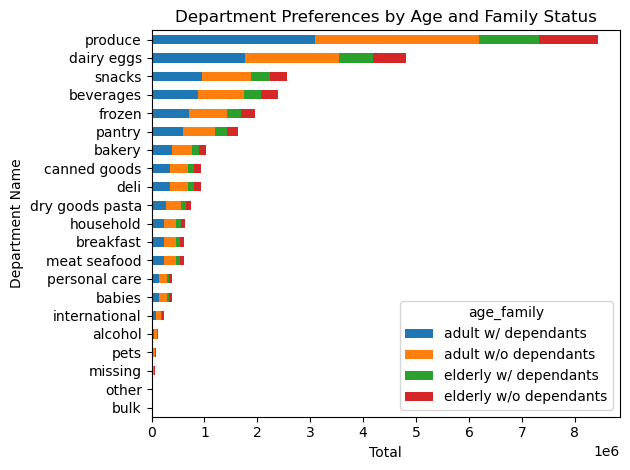

In [41]:
#sort by age_family 
age_family_department = age_family_department.sort_values(by = ['adult w/o dependants'], ascending = True)

#create a stacked bar chart of the age_family_department crosstab
age_family_department_bar = age_family_department.plot.barh(stacked = True)
age_family_department_bar.set_ylabel('Department Name')
age_family_department_bar.set_xlabel('Total')
age_family_department_bar.set_title('Department Preferences by Age and Family Status')

plt.tight_layout()

In [42]:
#export age_family_department_bar
age_family_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_preference_age_family.png'))

In [43]:
#create crosstab between region column and department_name columns 
region_departments = pd.crosstab(ords_prods_cust_v2['department_name'], ords_prods_cust_v2['Region'],dropna = False)

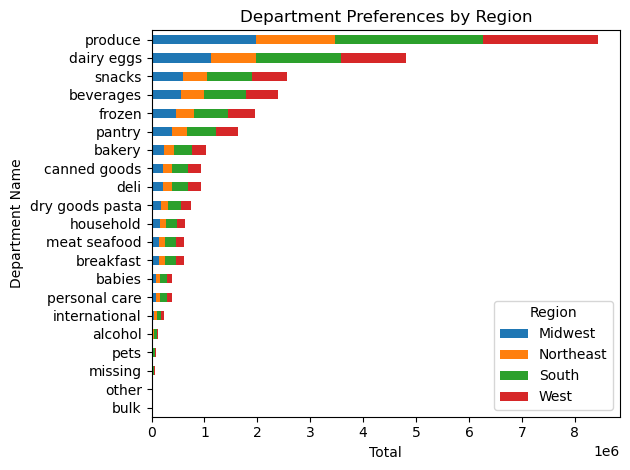

In [44]:
#Add titles and sort the region_departments figure
region_departments = region_departments.sort_values(by = ['South'], ascending = True)
region_departments = region_departments.plot.barh(stacked = True)
region_departments.set_ylabel('Department Name')
region_departments.set_xlabel('Total')
region_departments.set_title('Department Preferences by Region')
plt.tight_layout()


In [45]:
#export region_departments
region_departments.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_preference_region.png'))

#### Produce, dairy eggs, snacks, beverages, and frozen grocery items are the most popular departments according to both age and dependant status and region. This makes sense, because are common items that people need to purchase from grocery stores. 

# Question 9 
Produce suitable charts to illustrate your results and export them in your project folder.

In [46]:
#list all the columns in ords_prods_cust_v2
ords_prods_cust_v2.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spending',
 'spending_flag',
 'median_dspo',
 'order_behavior',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 '_merge',
 'Region',
 'Customer Activity',
 'age_status',
 'family_status',
 'age_family',
 'department_name']

# Does marriage affect spending habits? 

In [47]:
#create a new column containing age_family column and fam_status 
ords_prods_cust_v2['age_dependants_fam'] = ords_prods_cust_v2['age_family'] + ' (' + ords_prods_cust_v2['fam_status'] +')'

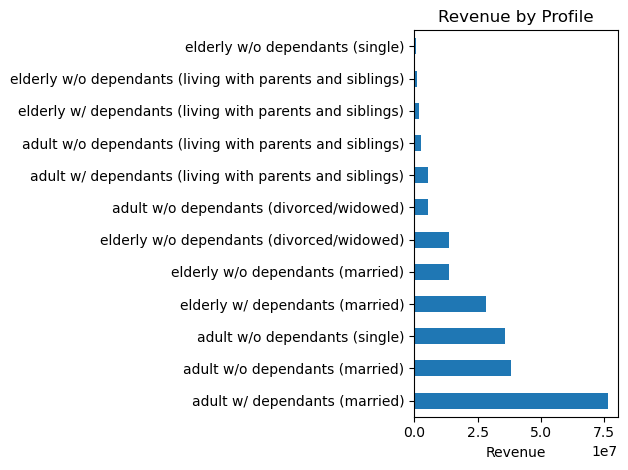

In [48]:
#plot age_dependents_fam status by prices 
prices_dependants = ords_prods_cust_v2.groupby('age_dependants_fam').agg({'prices': ['sum']})
sorted_prices_dependants = prices_dependants.sort_values(by=('prices', 'sum'), ascending=False)


sorted_prices_dependants = sorted_prices_dependants.plot.barh(legend = None)
sorted_prices_dependants.set_xlabel('Revenue')
sorted_prices_dependants.set_ylabel('')
sorted_prices_dependants.set_title('Revenue by Profile')

# Adjust the layout to fit the entire chart
plt.tight_layout()

### Adults that are married and have dependants spend the most compared to all other groups. They are followed by adults w/o dependents and are married. Then adults without dependants and are single. 

In [49]:
#Export sorted_prices_dependants.png
sorted_prices_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Profile_total_expenses.png'))

# Does region affect spending habits? 

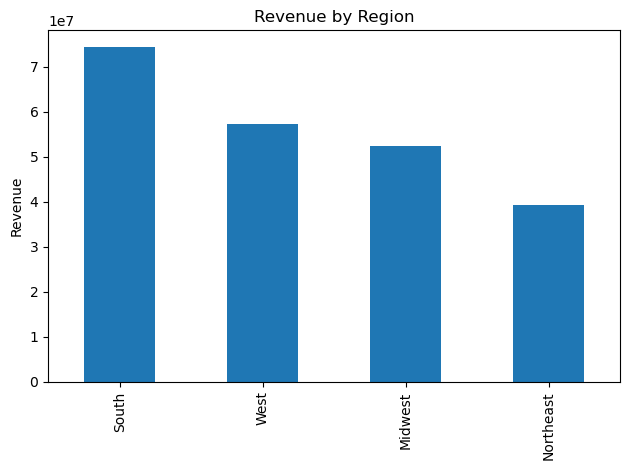

In [50]:
#Bar chart of total revenue by region 
prices_region = ords_prods_cust_v2.groupby('Region').agg({'prices': ['sum']})
sorted_prices_region = prices_region.sort_values(by=('prices', 'sum'), ascending=False)
sorted_prices_region = sorted_prices_region.plot.bar(legend = None)
sorted_prices_region.set_ylabel('Revenue')
sorted_prices_region.set_xlabel('')
sorted_prices_region.set_title('Revenue by Region')
plt.tight_layout()

In [51]:
#Export sorted_prices_dependants.png
sorted_prices_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_total_expenses.png'))

# What is the average income per region? 

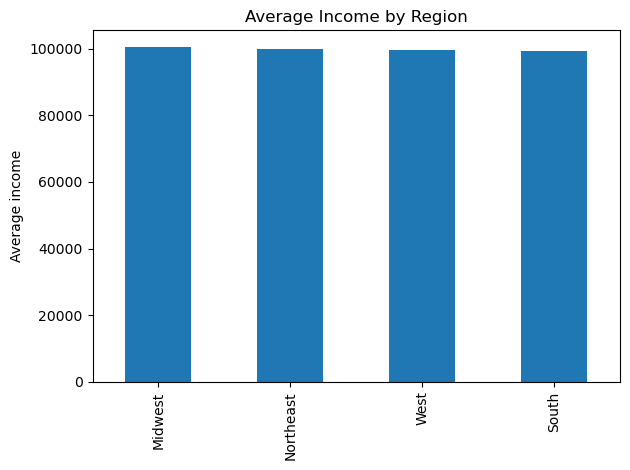

In [52]:
income_region = ords_prods_cust_v2.groupby('Region').agg({'income': ['mean']})
sorted_income_region = income_region.sort_values(by=('income', 'mean'), ascending=False)

# Set the figure size

sorted_income_region = sorted_income_region.plot.bar(legend = None)
sorted_income_region.set_ylabel('Average income')
sorted_income_region.set_xlabel('')
sorted_income_region.set_title('Average Income by Region')

# Adjust the layout to fit the entire chart
plt.tight_layout()


In [53]:
#Export sorted_income_region.png
sorted_income_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','average_income_region.png'))

# What is the average income per age, dependant, and family status? 

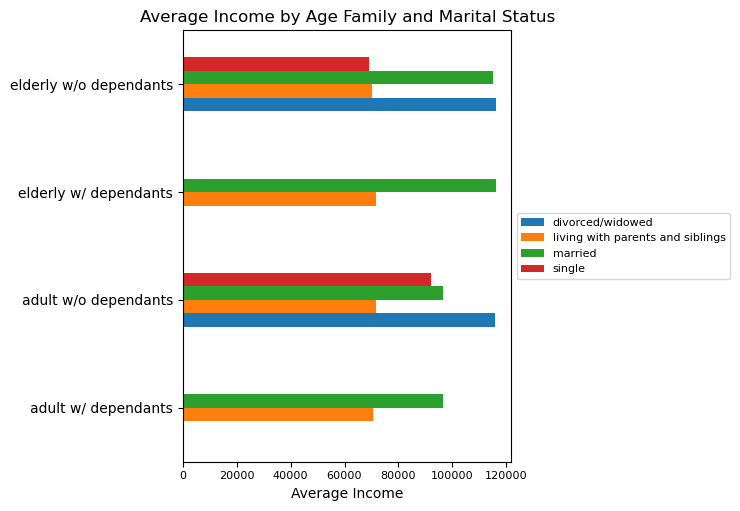

In [54]:
avg_income_age_family = ords_prods_cust_v2.groupby(['age_family', 'fam_status']).agg({'income': 'mean'}).reset_index()
filtered_data = avg_income_age_family[avg_income_age_family['fam_status'].isin(['single', 'married','divorced/widowed','living with parents and siblings'])]

# Set the figure size
fig, ax = plt.subplots(figsize=(7.5, 5.25))

# Pivot the filtered data to create a matrix with 'age_family' as rows and 'single' and 'married' as columns
pivot_table = filtered_data.pivot(index='age_family', columns='fam_status', values='income')

# Plot the grouped bar plot
avg_income_age_family = pivot_table.plot.barh(ax=ax)

# Set the labels and title
avg_income_age_family.set_xlabel('Average Income')
avg_income_age_family.set_ylabel('')
plt.title('Average Income by Age Family and Marital Status')
plt.legend(fontsize=8,loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to fit the entire chart
plt.tight_layout()

# Decrease the font size of the x-value labels
ax.tick_params(axis='x', labelsize=8)


In [55]:
#Export avg_income_age_family.png
avg_income_age_family.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','average_income_profile.png'))

# Export ords_prods_cust_v2 dataframe

In [57]:
ords_prods_cust_v2.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_version_two.pkl'))